#### QUICKSTART

In [1]:
import mujoco
import mediapy as media
import os
import numpy as np

""

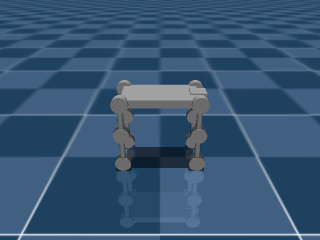

In [2]:
# Load model, see how it looks

mj_model = mujoco.MjModel.from_xml_path(os.path.join(os.getcwd(), "output_xmls", "basic_connieped.xml"))

mj_data = mujoco.MjData(mj_model)
renderer = mujoco.Renderer(mj_model)
mujoco.mj_forward(mj_model, mj_data)
renderer.update_scene(mj_data, "base")
media.show_image(renderer.render())

""

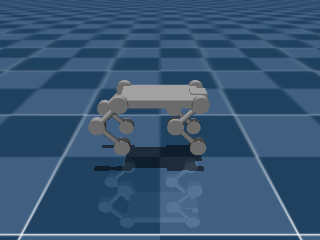

In [6]:
# Set the pose by joint name

hip_angle = -np.pi/4
shank_angle = -hip_angle * 2
quads = ["RF", "LF", "RH", "LH"]
for q in quads:
    mj_data.joint("{}_HJ".format(q)).qpos = hip_angle
    mj_data.joint("{}_KJ".format(q)).qpos = shank_angle

mujoco.mj_forward(mj_model, mj_data)
renderer.update_scene(mj_data, "base")
media.show_image(renderer.render())

""

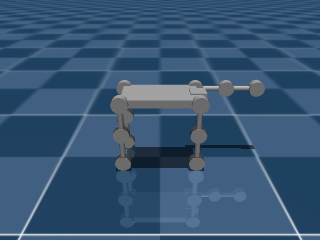

In [3]:
# You can also set the pose by joint index. 
# qpos is an 15-element vector with qpos[7:] corresponding to joint angles.
# The ordering for these is by quadrants (["RF", "LF", "RH", "LH"]). Within each quadrant, it's hip then thigh.
mj_data.qpos[7] = np.pi/2
mj_data.qpos[8] = 0
mujoco.mj_forward(mj_model, mj_data)
renderer.update_scene(mj_data, "base")
media.show_image(renderer.render())

In [17]:
# You can get back to this default pose using the "keyframe" that I saved in the xml file:
mujoco.mj_resetData(mj_model, mj_data) 
mj_data.qpos = mj_model.keyframe('standing').qpos
mj_data.qvel = np.zeros(mj_model.nv)
mj_data.ctrl = mj_model.keyframe('standing').ctrl

# Now, simulate the robot for 2 seconds. Note: simulating is *much* faster than rendering.

duration = 2  # (seconds)
framerate = 30  # (Hz)

# Simulate and display video.
frames = []

while mj_data.time < duration:
  mujoco.mj_step(mj_model, mj_data)
  if mj_data.time > 1:
    mj_data.ctrl = np.zeros(8)

  # RENDER
  if len(frames) < mj_data.time * framerate:
    renderer.update_scene(mj_data, "base")
    pixels = renderer.render()
    frames.append(pixels)

media.show_video(frames, fps=framerate)
save_path = os.path.join(os.getcwd(),"outputs", "standing_still.gif")
media.write_video(save_path, frames, fps=framerate, codec="gif")

#### APPENDIX
##### WHEELS
The wheels can easily be unlocked and added as 4 separate control inputs. Reach to me out for how!

##### CONTACTS
1. Collisions between bodies within the robot are ignored.
2. Collisions between all bodies within the robot and the plane are *not* ignored. Ignoring them can speed up simulation. To do so, set contype="8" conaffinity="16" in line 15.
